In [1]:
%matplotlib inline
import numpy as np
import xarray as xr
#from cartopy import crs, feature
from datetime import datetime, timedelta
import cmocean
from matplotlib import pyplot as plt, animation, rc,colors
from IPython.display import Image
rc('animation', html='html5')
import os
import sys
import re

In [2]:
path_run = '/home/jvalenti/scratch/run_SHEM/months-SHEM/' 

In [3]:
M_path = '/home/jvalenti/projects/def-allen/jvalenti/MEOPAR/'
coords = xr.open_dataset(M_path+'grid/coordinates_seagrid_SalishSea201702.nc', decode_times=False)
mask = xr.open_dataset(M_path+'grid/mesh_mask202108.nc')
lon = coords.nav_lon
x= np.linspace(0,lon.shape[1],lon.shape[1])
y = np.linspace(0,lon.shape[0],lon.shape[0])
X,Y = np.meshgrid(x,y)

In [4]:
jjii = xr.open_dataset('~/MOAD/grid/grid_from_lat_lon_mask999.nc')
def finder(lati,loni):
    j = [jjii.jj.sel(lats=lati, lons=loni, method='nearest').item()][0]
    i = [jjii.ii.sel(lats=lati, lons=loni, method='nearest').item()][0]
    return j,i

In [5]:
def make_filename(path,start,day, var='prod_T', res='h'):
    """Construct path prefix for local SHEM results given date object and paths dict
    """
    date  =  (start + timedelta(days=day))
    folder = date.strftime("%d%b%y").lower()
    prefix = os.path.join(path_run, f'{folder}/')
    fname = []
    for file in os.listdir(prefix):
        if var in file:
            fname.append(file)
    if len(fname)>1:
        print('more than one file found') 
    
    return os.path.join(prefix, fname[0])


In [6]:
day = 181
start = datetime(2021,1,1)
make_filename(path_run,start,day, var='prod_T', res='d')

'/home/jvalenti/scratch/run_SHEM/months-SHEM/01jul21/SHEM_1d_20210604_20210701_prod_T.nc'

In [7]:
prod = xr.open_dataset(make_filename(path_run,start,day, var='prod_T', res='d')).HetHBAC
Nat_mort = xr.open_dataset(make_filename(path_run,start,day, var='graz_T', res='d')).MORTHBAC
Mic_graz = xr.open_dataset(make_filename(path_run,start,day, var='graz_T', res='d')).GRMICZHBAC
PP0 = xr.open_dataset(make_filename(path_run,start,0, var='prod_T', res='d')).PPDIAT
PP = xr.open_dataset(make_filename(path_run,start,day, var='prod_T', res='d')).PPDIAT


Ox0 = xr.open_dataset(make_filename(path_run,start,0, var='chem_T')).dissolved_oxygen
Ox = xr.open_dataset(make_filename(path_run,start,day, var='chem_T')).dissolved_oxygen
DIC = xr.open_dataset(make_filename(path_run,start,day, var='chem_T')).dissolved_inorganic_carbon



NH4 = xr.open_dataset(make_filename(path_run,start,day, var='biol_T')).ammonium
NH40 = xr.open_dataset(make_filename(path_run,start,0, var='biol_T')).ammonium
NO3 = xr.open_dataset(make_filename(path_run,start,day, var='biol_T')).nitrate
diat0 = xr.open_dataset(make_filename(path_run,start,0, var='biol_T')).diatoms
diat = xr.open_dataset(make_filename(path_run,start,day, var='biol_T')).diatoms

flag0 = xr.open_dataset(make_filename(path_run,start,0, var='biol_T')).flagellates
flag = xr.open_dataset(make_filename(path_run,start,day, var='biol_T')).flagellates

hbac = xr.open_dataset(make_filename(path_run,start,day, var='biol_T')).heterotrophic_bacteria
DOM = xr.open_dataset(make_filename(path_run,start,day, var='biol_T')).dissolved_organic_nitrogen
DOM0 = xr.open_dataset(make_filename(path_run,start,0, var='biol_T')).dissolved_organic_nitrogen
POM = xr.open_dataset(make_filename(path_run,start,day, var='biol_T')).particulate_organic_nitrogen
POM0 = xr.open_dataset(make_filename(path_run,start,0, var='biol_T')).particulate_organic_nitrogen

more than one file found
more than one file found
more than one file found
more than one file found
more than one file found
more than one file found


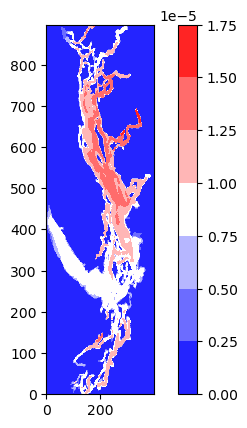

In [8]:
plt.contourf(np.sum(Nat_mort[0,:,:,:],axis=0),cmap='bwr')
plt.colorbar()
f = 1.0/np.cos(49*np.pi/180)
plt.gca().set_aspect(f)

In [9]:
Orray = np.array(Ox[0,:,:,:])
def findanox(Orray):
    oflat =Orray.flatten()
    positions = np.where((oflat<65) & (oflat>0))
    coords = np.unravel_index(positions[0], Orray.shape)

    xy = []
    for ind in range(coords[0].shape[0]):
        xy.append((coords[1][ind],coords[2][ind]))
    set_coord = set(xy)
    xx = []
    yy = []
    for tup in set_coord:
        yy.append(tup[0])
        xx.append(tup[1])
    return xx,yy

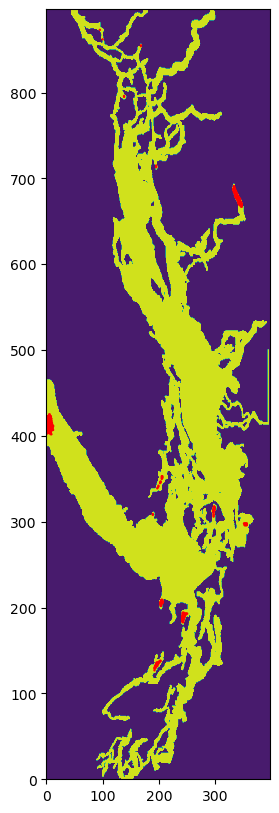

In [10]:
plt.figure(figsize=(10,10))
plt.contourf(mask.tmask[0,0,:,:])
xx,yy = findanox(Orray)
plt.scatter(xx,yy,s=np.ones(len(yy))*0.5,color='red')
f = 1.0/np.cos(49*np.pi/180)
plt.gca().set_aspect(f)

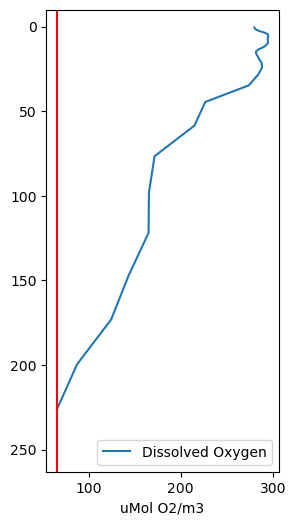

In [11]:
jj,ii = finder(48.58042615605835, -123.50289311333903)
zz = np.argmin(np.array(mask.tmask[-1,:,jj,ii]))
fig,axs=plt.subplots(1,figsize=(3,6))
plt.plot(Ox[-1,:zz,jj,ii],Ox.deptht[:zz],label='Dissolved Oxygen')
plt.axvline(x = 65,color = 'red')

plt.ylim([hbac.deptht[zz]+10,-10])
plt.xlabel('uMol O2/m3')
plt.legend()

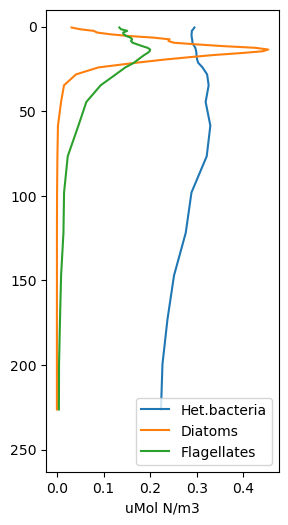

In [12]:
#jj,ii = finder(49.286779538295114, -123.74497535526103)
fig,axs=plt.subplots(1,figsize=(3,6))
plt.plot(hbac[-1,:zz,jj,ii],hbac.deptht[:zz],label='Het.bacteria')
plt.plot(diat[-1,:zz,jj,ii],hbac.deptht[:zz],label='Diatoms')
plt.plot(flag[-1,:zz,jj,ii],hbac.deptht[:zz],label='Flagellates')

plt.ylim([hbac.deptht[zz]+10,-10])
plt.xlabel('uMol N/m3')
plt.legend()

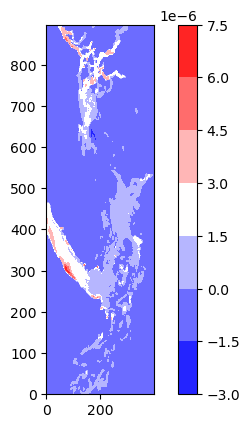

In [13]:
plt.contourf(np.sum(prod[0,:,:,:],axis=0)-np.sum(Mic_graz[0,:,:,:],axis=0)-np.sum(Nat_mort[0,:,:,:],axis=0),cmap='bwr')
plt.colorbar()
f = 1.0/np.cos(49*np.pi/180)
plt.gca().set_aspect(f)

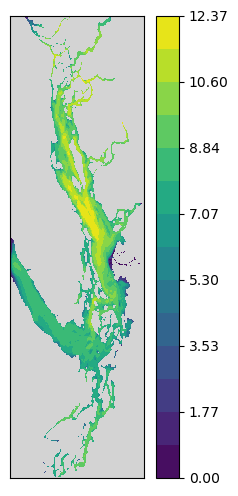

In [14]:
fig,ax=plt.subplots(1,figsize=(3,6))
im = plt.contourf(np.sum(hbac[-1,:,:,:],axis=0),levels=np.linspace(0,np.nanmax(np.sum(hbac[-1,:,:,:],axis=0)),15))
ax.contourf(X, Y, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
ax.set_xticks([])
ax.set_yticks([])
f = 1.0/np.cos(49*np.pi/180)
plt.gca().set_aspect(f)
plt.colorbar()


In [15]:
DOM_notz = np.array(DOM[0,:,:,:]).flatten()
DOM_notz=DOM_notz[DOM_notz!=0]
np.nanmean(DOM_notz)

2.710003

In [16]:
def steadystate(file='biol_T',var = 'heterotrophic_bacteria',res=1):
    startT = datetime(2021, 1, 1)
    lenT = 3600 #hours from start to run
    
    filelib = {}
    hbac =[]

    for days in range(0,1+(lenT-1)//24,res):
        timeT = startT + timedelta(days=days)
        ti = timeT.strftime('%Y%m%d')  
        filelib[days,var]= xr.open_dataset(make_filename(path_run,startT,days, file, res='h'))[var]
        hbac.append(np.nansum(np.array(filelib[days,var][0,:,:,:]).flatten()))
    plt.plot(hbac)

In [31]:
cmapa = 'RdPu'
def animaox(path,var,startT,lenT,fps=1,var_name='concentration'):
    if fps is int:
        framess = np.arange(0,lenT,fps)
    else:
        framess = np.linspace(0,lenT-1,int(lenT/fps),dtype=int)
    filelib = {}
    oxlib = {}
    for days in range(1+(lenT-1)//24):
        timeT = startT + timedelta(days=days)
        ti = timeT.strftime('%Y%m%d')  
        filelib[days]= xr.open_dataset(make_filename(path,startT,days, var='biol_T', res='h'))[var]
        oxlib[days]= xr.open_dataset(make_filename(path,startT,days, var='chem_T', res='h'))['dissolved_oxygen']
    fig, ax = plt.subplots(figsize=(4, 10))
    totvol = 2.5e6
    maxc = 0.5#np.nanmax(filelib[0][0,0,:,:])
    im = plt.contourf(filelib[0][0,0,:,:],levels=np.linspace(0,maxc,20),cmap=cmapa)
    ax.contourf(X, Y, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.yaxis.set_tick_params(labelleft=False)
    ax.set_xticks([])
    ax.set_yticks([])

    #ax[0] = inset_axes(ax, width="30%", height="30%", loc="upper right")
    # flat = np.nansum(np.array(filelib[0][0,:,:,:]).flatten())/totvol
    # ax[0].scatter(0,flat,color='r')
    # ax[0].set_xlim(-10,1155)
    # ax[0].set_ylim(0,0.4)

    f = 1.0/np.cos(49*np.pi/180)
    ax.set_aspect(f)
    cbar = plt.colorbar(im, location='right',aspect=40,shrink=1,pad=0.05,ax=ax)
    cbar.set_label(var_name)
    
    def update(frame):        
        ax.clear()
        t = ax.text(0.02, 0.02, '', color='black', 
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'), transform=ax.transAxes)
        tstamp = startT +timedelta(hours=int(frame))
        t.set_text(tstamp.strftime('%Y-%b-%d %H:%M'))
        countday = frame//24
        ax.contourf(np.sum(filelib[countday][frame-24*countday,:1,:,:],axis=0),levels=np.linspace(0,maxc,20),cmap=cmapa)
        ax.contourf(X, Y, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
        xx,yy = findanox(np.array(oxlib[countday][frame-24*countday,:,:,:]))
        ax.scatter(xx,yy,s=np.ones(len(yy))*0.5,color='blue')
        #flat = np.nansum(np.array(filelib[countday][frame-24*countday,:,:,:]).flatten())/totvol
        #ax[0].scatter(frame,flat,color='r')
        ax.xaxis.set_tick_params(labelbottom=False)
        ax.yaxis.set_tick_params(labelleft=False)
        ax.set_xticks([])
        ax.set_yticks([])
        return 
    return animation.FuncAnimation(fig, update, frames=framess)

In [ ]:
plotslib = {'chem_T':{'var':['dissolved_oxygen']},
        'biol_T':{'var':['diatoms','heterotrophic_bacteria','particulate_organic_nitrogen','dissolved_organic_nitrogen','ammonium','nitrate','flagellates']}
        }
variables = ['O2','Diat','Hbac','PON','DON','NH4','NO3','Flag']
startT = datetime(2021, 1, 1)
lenT = 4344 #hours from start to run
res = 2
#steadystateplots(startT,lenT,plotslib,res=1)

#def steadystateplots(startT,lenT,plotslib,res=1):
filelib = {}
count = np.zeros([len(variables),int((lenT//24)/res)+1])

for i,days in enumerate(range(0,1+(lenT-1)//24,res)):
    for files in plotslib:
        if files == 'chem_T':
            c = -1
        else:
            c = 0
        filelib[days,files]= xr.open_dataset(make_filename(path_run,startT,days, files, res='h'))
        for j,var in enumerate(plotslib[files]['var']):
            count[1+j+c,i]=(np.nansum(np.array(filelib[days,files][var][0,:,:,:]).flatten()))

more than one file found
more than one file found
more than one file found
more than one file found


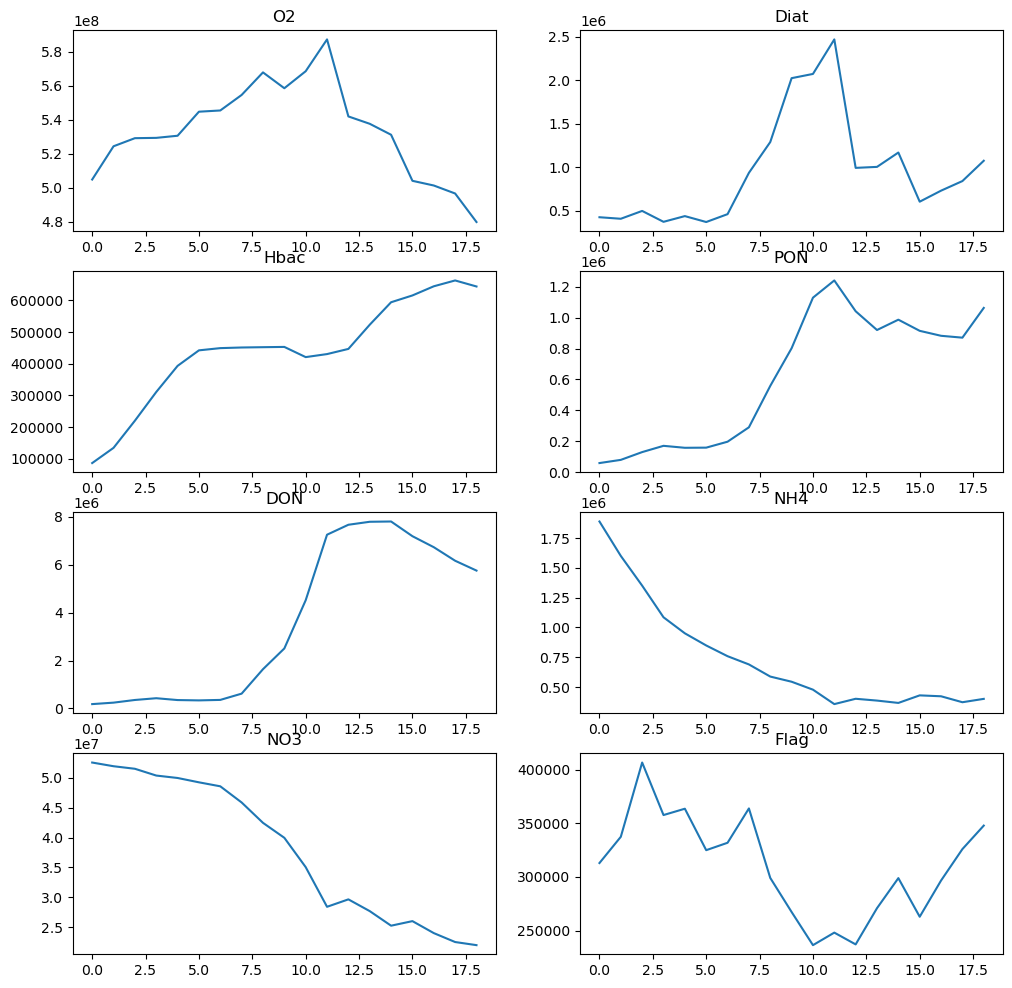

In [30]:
def plot_subplots(data_list,data, ncols=2, figsize=(12, 12)):

    nplots = len(data_list)
    nrows = int(np.ceil(nplots / ncols))

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = np.array(axes).reshape(-1)  # flatten in case of multi-row

    for i, variable in enumerate(data_list):
        axes[i].plot(data[i,:])
        axes[i].set_title(f"{variable}")
        
plot_subplots(variables,count, ncols=2, figsize=(12, 12))

In [ ]:
cmapa = 'RdPu'
def anima(path,var,startT,lenT,fps=1,var_name='concentration'):
    if fps is int:
        framess = np.arange(0,lenT,fps)
    else:
        framess = np.linspace(0,lenT-1,int(lenT/fps),dtype=int)
    filelib = {}
    for days in range(1+(lenT-1)//24):
        timeT = startT + timedelta(days=days)
        ti = timeT.strftime('%Y%m%d')  
        filelib[days]= xr.open_dataset(make_filename(path,startT,days, var='biol_T', res='h'))[var]
    fig, ax = plt.subplots(figsize=(4, 10))
    totvol = 2.5e6
    maxc = 0.6#np.nanmax(filelib[0][0,0,:,:])
    im = plt.contourf(filelib[0][0,0,:,:],levels=np.linspace(0,maxc,20),cmap=cmapa)
    ax.contourf(X, Y, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.yaxis.set_tick_params(labelleft=False)
    ax.set_xticks([])
    ax.set_yticks([])

    #ax[0] = inset_axes(ax, width="30%", height="30%", loc="upper right")
    # flat = np.nansum(np.array(filelib[0][0,:,:,:]).flatten())/totvol
    # ax[0].scatter(0,flat,color='r')
    # ax[0].set_xlim(-10,1155)
    # ax[0].set_ylim(0,0.4)

    f = 1.0/np.cos(49*np.pi/180)
    ax.set_aspect(f)
    cbar = plt.colorbar(im, location='right',aspect=40,shrink=1,pad=0.05,ax=ax)
    cbar.set_label(var_name)
    
    def update(frame):        
        ax.clear()
        t = ax.text(0.02, 0.02, '', color='black', 
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'), transform=ax.transAxes)
        tstamp = startT +timedelta(hours=int(frame))
        t.set_text(tstamp.strftime('%Y-%b-%d %H:%M'))
        countday = frame//24
        ax.contourf(np.sum(filelib[countday][frame-24*countday,:1,:,:],axis=0),levels=np.linspace(0,maxc,20),cmap=cmapa)
        ax.contourf(X, Y, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
        #flat = np.nansum(np.array(filelib[countday][frame-24*countday,:,:,:]).flatten())/totvol
        #ax[0].scatter(frame,flat,color='r')
        ax.xaxis.set_tick_params(labelbottom=False)
        ax.yaxis.set_tick_params(labelleft=False)
        ax.set_xticks([])
        ax.set_yticks([])
        return 
    return animation.FuncAnimation(fig, update, frames=framess)

In [ ]:
start = datetime(2021, 1, 1)
lenT = 4344 #hours from start to run
path_yes = path_run+'/SHEM_1h_20210121_20210217_biol_T_'
var = 'heterotrophic_bacteria'
label = r'Hbac mMol N/m$^3$'
ani = animaox(path_yes,var,start,lenT,fps=6,var_name=label)
f = r"/home/jvalenti/MOAD/hbact_may.gif" 
FFwriter = animation.FFMpegWriter()
ani.save(f, writer = FFwriter)

more than one file found
more than one file found


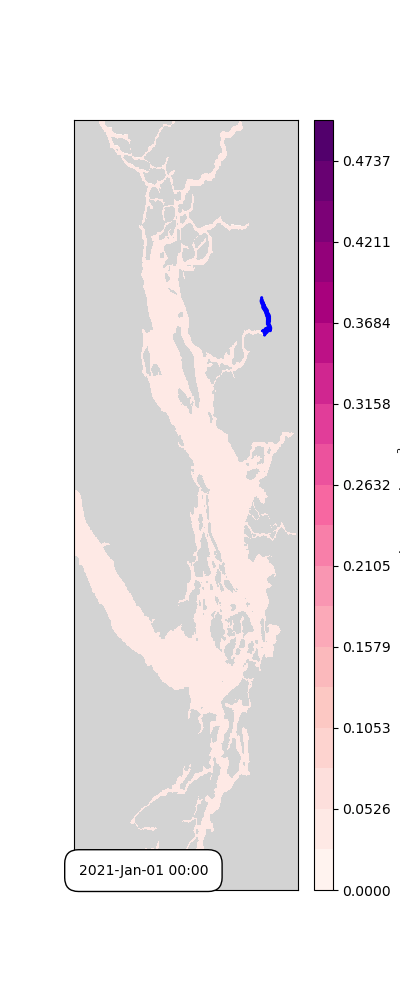

In [ ]:
from IPython.display import Image
with open(f,'rb') as anim:
     display(Image(anim.read()))